# Ordinary Differential Equations : Initial value problems

This notebook shows simplified approaches to solve ordinary differential equations with given initial conditions.This is called an *Initial Value Problem*. 

In general, what we want to solve is the ordinary differential equation  of first-order of the form
$$\frac{dy}{dt} = f(t, y),$$
where $y$ represents, for instance, the system state, and $f(y, t)$ is the function that describes the change in time and, in general, depends both on the current system state and the time.

## Euler method
Let's take equation (1) and check that the derivative can be approximated as
$$\frac{dy}{dt} = f(t, y) = \frac{y(t+\delta t) - y(t)}{\delta t} ,$$
for a sufficiently small time step $\delta t$ . If you discretize the time in steps of size $\delta t$, you can identify the time $t + \delta t$ as the next time after time $t$, so you can write the next value for $y$ in terms of the current one as
$$y(t+\delta t) = y(t) + \delta t f(y, t) +O(\delta t^2) .$$
This is the so-called **Euler Method**, and you can interpret it as constructing a straight line between the two points. See the next figure, from Chapra. The local error is of order $\delta t^2$ because we are ignoring first that term in the series expansion of $y(t+\delta t)$.  

Basically you need to know the initial position and then you can iterate to obtain later values:

* iter = 0, time = $0$, $y(0)$
* iter = 1, time = $\delta t$, $y(\delta t) = y(0) + \delta t f(y(0), 0)$
* iter = 2, time = $2\delta t$, $y(2\delta t) = y(\delta t) + \delta t f(y(\delta t), \delta t)$
* iter = 3, time = $3\delta t$, $y(3\delta t) = y(2\delta t) + \delta t f(y(2\delta t), 2\delta t)$
* ...
 

<img src="fig/euler-01.png" width=500>


**Although the Euler method is simple to implement, its error is large and sometimes it might be unstable**.

[1.23677314e+05 2.47353869e+04 1.23676510e+04 2.47347310e+03
 1.23670667e+03 2.47309798e+02 1.23644337e+02 2.47269492e+01]


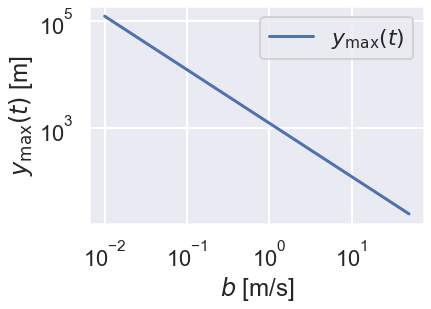

In [20]:
%matplotlib inline

def fderiv(t, y, b):
    return np.array([y[1], -G*R**2/(R+y[0])**2 - b*y[1]])

def hitground(t, y) : 
    return y[0] 
hitground.terminal = True # stops if hitground == 0
hitground.direction = -1 # only when going down

def max_height(b):
    tmax = 4000
    v0 = 1237.0
    T = np.arange(0, tmax, DT)
    Y0 = np.array([0, v0]) # initial position, initial velocity
    sol = solve_ivp(fun=lambda t, y : fderiv(t, y, b), t_span=[T.min(), T.max()], t_eval=T, y0=Y0, events=hitground)
    return np.max(sol.y[0])

B = np.array([0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0])
print(YMAX)
YMAX = np.array(list(map(max_height, B)))

fig, ax = plt.subplots()
ax.plot(B, YMAX, label=r"$y_{\max}(t)$")
ax.set_xlabel(r"$b$ [m/s]")
ax.set_ylabel(r"$y_{\max}(t)$ [m]")
ax.set_yscale("log")
ax.set_xscale("log")

ax.legend()


## Example  comparing the Euler method with the scipy function
Following Chapra, let's solve the following ordinary differential equation by means of the Euler method,
$$\frac{dy}{dt} = 4e^{0.8t} - 0.5y,$$
whose solution is 
$$y = \frac{4}{1.3}(e^{0.8t} - e^{-0.5t}) + 2e^{-0.5t}.$$
Let's solve it from $t =0$ to $t=4$ in steps $\delta t = 1$. The initial condition is $y=2$ when $t=0$. Your task is to  solve the differential equation and to compare with the theoretical solution. 

To do so, please first use the `solve_ivp` function from scipy. You will also need to define a function, called `fderiv`, that returns the derivate of the function and receives the time and the current value of $y$. Once those functions are defined defined, use them to plot the numerical and the theoretical solution. 

The official docs for the modern method to use from scipy to solve a system of ordinary differential equations is found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp . Please go read it and then come back to try it.

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.09222001, 1.01442011, 2.58593217, 4.        ])
 t_events: None
        y: array([[ 2.        ,  2.28411606,  6.27881264, 24.06083504, 75.34536894]])
 y_events: None
[0.         0.09222001 1.01442011 2.58593217 4.        ]
[[ 2.          2.28411606  6.27881264 24.06083504 75.34536894]]
Diff Scipy: [[ 0.00000000e+00 -1.45670143e-11 -3.42114320e-05 -2.89626885e-03
  -6.40633115e-03]]
Diff Euler: [ 0.          1.19463138  3.44175819  8.16396021 18.48965131]


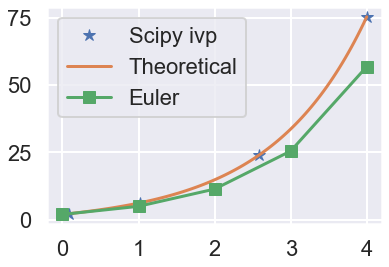

In [27]:
# Simple example for scipy.integrate.solve_ivp
import numpy as np
from scipy.integrate import solve_ivp

def fderiv(t, y):
    return 4*np.exp(0.8*t) - 0.5*y

def ytheo(t):
    return 4*(np.exp(0.8*t) - np.exp(-0.5*t))/1.3 + 2*np.exp(-0.5*t)

# PARAMS
T0 = 0.0
TF = 4.0
Y0 = 2.0

# solve using scipy
sol = solve_ivp(fderiv, t_span=[T0, TF], y0=[Y0])
print(sol)
print(sol.t)
print(sol.y)

# solve using euler
DT = 1.0
t_euler = np.arange(T0, TF+DT, DT)
y_euler = np.zeros_like(t_euler)
y_euler[0] = Y0
for ii in range(0, len(y_euler)-1):
    y_euler[ii+1] = y_euler[ii] + DT*fderiv(t_euler[ii], y_euler[ii])

# Plot 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '*', label=f"Scipy ivp")
#ax.plot(sol.t, sol.y[0], '-*', label="Scipy ivp, DT=1.0")
# theoretical
t = np.linspace(T0, TF, 100)
ax.plot(t, ytheo(t), '-', label="Theoretical")
# euler
ax.plot(t_euler, y_euler, '-s', label='Euler')

# activate legend
ax.legend()

# Print differences
print(f"Diff Scipy: {ytheo(sol.t) - sol.y}")
print(f"Diff Euler: {ytheo(t_euler) - y_euler}")


This clearly shows the advantage of using scipy solve ivp. Now let's specify the exact times we want:

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])
 t_events: None
        y: array([[ 2.        ,  3.75147098,  6.19466434,  9.70596322, 14.83799037,
        22.42925878, 33.67829876, 50.40237392, 75.34536894]])
 y_events: None


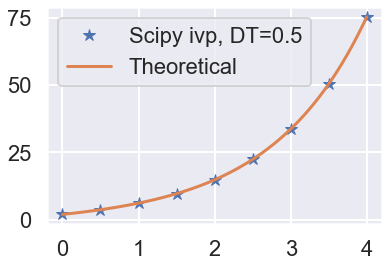

In [36]:
DT = 0.5
t = np.arange(T0, TF+DT, DT)
sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=t, y0=[Y0]) # check t_eval
print(sol)


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")
fig, ax = plt.subplots()
ax.plot(t, sol.y[0], '*', label=f"Scipy ivp, {DT=}")
#ax.plot(sol.t, sol.y[0], '-*', label="Scipy ivp, DT=1.0")
# theoretical
t = np.linspace(0.0, 4, 100)
ax.plot(t, ytheo(t), '-', label="Theoretical")
ax.legend()


## Exercise
<img src="fig/problem-1.png" width=700>

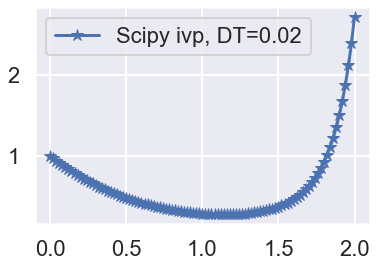

In [37]:
import numpy as np
from scipy.integrate import solve_ivp

def fderiv(t, y):
    # FILL HERE
    pass

Y0 = 1.0
TF = 2.0
DT = (TF-0.0)/100
t = np.arange(0.0, TF+DT, DT)

sol = # FILL HERE

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(t, sol.y[0], '-*', label=f"Scipy ivp, {DT=}")
ax.legend()

# Case: Bacterial growth (Giuliana's data)
The following table shows the number of bacteria in an experiment as a function of time:

| Time (hours) | Cell number |
|-|-|
|0|1|
|0.5|2|
|1.0|4|
|1.5|8|
|2.0|16|
|2.5|32|
|3.0|64|
|3.5|128|
|4.0|256|
|4.5|512|
|5.0|1024|

Our goal is to model this with a differential equation. Let's plot the data

Text(0, 0.5, 'n')

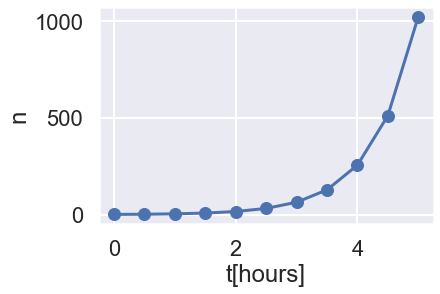

In [55]:
import numpy as np
t_expe = np.linspace(0.0, 5.0, 11)
n_expe = np.power(2.0, np.arange(len(t_expe)))

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(t_expe, n_expe, '-o')
ax.set_xlabel("t[hours]")
ax.set_ylabel("n")

It looks like a non-bounded exponential growth. Actually, the first population dynamics model can be written as

$$
\frac{dn}{dt} = r n,
$$
that is, the larger the population, the larger its increase (is this sustainable?). The theoretical solution is 
$$
n(t) = n(0) e^{rt}.
$$
In order to compare if this model describes the data, and the actual $k$ value, let's fit the data and solve the differential equation numerically. 

In [59]:
# fitting to compute r
from scipy.optimize import curve_fit
def ftheo(x, a, b):
    return a*np.exp(b*x)
popt, pcov = curve_fit(ftheo, t_expe, n_expe)
print(popt, pcov)
print(2*np.log(2)) # Why this number?

[1.         1.38629436] [[ 7.85645284e-30 -1.61777852e-30]
 [-1.61777852e-30  3.34712708e-31]]
1.3862943611198906


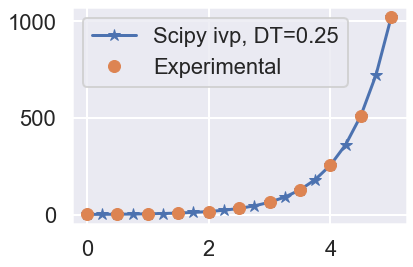

In [61]:
# Solving the differential equation and plotting
r = 2*np.log(2)

import numpy as np
from scipy.integrate import solve_ivp

def fderiv(t, y):
    return r*y

Y0 = 1.0
TF = 5.0
DT = 0.25
t = np.arange(0.0, TF+DT, DT)

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=t, y0=[Y0])

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(sol.t, sol.y[0], '-*', label=f"Scipy ivp, {DT=}")
ax.plot(t_expe, n_expe, 'o', label="Experimental")
ax.legend()

That shows that the differential equation correctly models the dynamics. But in reality resources are finite so the population will reach a plateau and/or eventually die. Real data shows that
<img src="fig/RealData-bacteria.png">

Therefore, some kind of competion must be included. A refinement for the model is as follows:
$$
\frac{dn}{dt} = r(1-\frac{n}{K}),
$$
the famous logistic equation, whose solution is a concave curve that that too much population increases fight for resources. See https://en.wikipedia.org/wiki/Logistic_function . The dimensionless solutions are as follows  

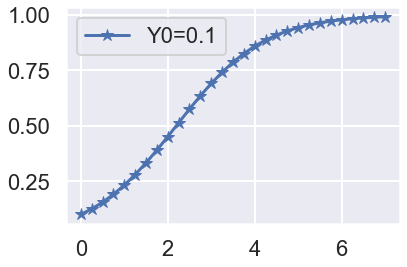

In [67]:
import numpy as np
from scipy.integrate import solve_ivp

def fderiv(t, y):
    return y*(1-y)

Y0 = 0.1
TF = 7.0
DT = 0.25
t = np.arange(0.0, TF+DT, DT)

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=t, y0=[Y0])

fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], '-*', label=f"{Y0=}")

ax.legend()

# Systems of Ordinary Differential Equations

Previously we studied systems where there was only one interesting variable so the differential equation describe only changes on that variable. There are systems where the state is described by two or more variables. In this case, we have several differential equations, like the following (see the SIR model)
$$\frac{dx}{dt} = f_1(x, y, t)\\
\frac{dy}{dt} = f_2(x, y, t),$$
where $x$ and $y$ are variables that describe the system state  and $f_1$ and $f_2$ are the functions describing their derivatives. To solve this system and improve the notation we can think of $x$ and $y$ as the components of a state vector called, for example, $\vec s = [x, y]$. Also, the function $f_1$ and $f_2$ can be seen as the components of a vector, let's call it $\vec f = [f_1, f_2]$. By using this , we can rewrite the system as
$$\frac{d\vec s}{dt} = \vec f(\vec s, t).$$
Solving this system is similar to what we did with the Euler, only that now everything is vectorial, but the same basic equation applies:
$$\vec s_{i+1} = \vec s_i + \vec f \delta t.$$
Therefore, you need to define a function to model $\vec f$ that receives the state vector $\vec s$, the current time, and returns the derivatives. 

In [1]:
# example for fderiv, adapt to your own problem. It now returns a vector.

# You can visualize this code in pythontutor, with python 3.6 with anaconda

import numpy as np
def fderiv(t, y):
    return np.array([-y[0]+2*y[1], y[0]])
    
x, y = fderiv(0.3, [2, 4])
print(x)
print(y)

6
2


## Exercise (From Chapra): Projectile, adding a stopping condition
(22.6) Suppose that a projectile is launched upward from the earth's surface. Assume that the only force acting on the object is the downward force of gravity. Under these conditions, a force balance can be used to derive
$$
\frac{dv}{dt} = -g(0)\frac{R^2}{(R+x)^2},
$$
where $v =$ upward velocity (m/s), $t =$ time (s), $x =$ altitude (m) measured upward from the earth’s surface, $g(0) =$ the gravitational acceleration at the earth’s surface ($\simeq 9.81$ m/s$^2$), and $R =$ the earth's radius ($\simeq 6.37\times 10^6$ m). Recognizing that $dx/dt = v$, use `scipy` method to determine the maximum height that would be obtained if $v(t = 0) = 1500$ m/s.

In [30]:
from scipy.integrate import solve_ivp

def fderiv(t, y):
    x, v = y
    return np.array([v, -G*R**2/(R+x)**2])
    #return np.array([y[1], -G*R**2/(R+y[0])**2])

G = 9.81
R = 6.37e6
DT = 0.1

T = np.arange(0.0, 350, DT)
Y0 = np.array([0, 1500]) # initial position, initial velocity
sol = solve_ivp(fderiv, t_span=[T.min(), T.max()], t_eval=T, y0=Y0)
print(sol.t)
print(sol.y[0]) # position
print(sol.y[1]) # velocity
# TIP : Copy this and the previous cell into the python tutor to see execution

[0.000e+00 1.000e-01 2.000e-01 ... 3.497e+02 3.498e+02 3.499e+02]
[     0.            149.95095077    299.80380616 ... -61127.93913659
 -61314.01509783 -61500.19089803]
[ 1500.          1499.01902309  1498.03809236 ... -1860.25689103
 -1861.25702359 -1862.25721466]


116791.35952928354


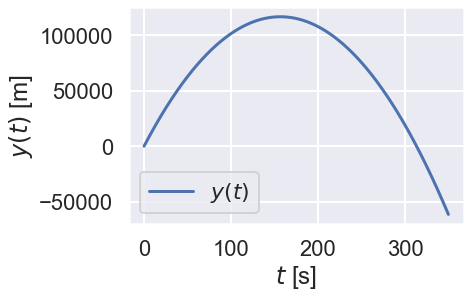

In [31]:
# Plot the previous data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label=r"$y(t)$")
#ax.plot(sol.t, sol.y[1], label=r"$v_y(t)$")
ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$y(t)$ [m]")
ax.legend()

print(np.max(sol.y[0]))
# y[0] -> x
# y[1] -> v

116802.24776943945


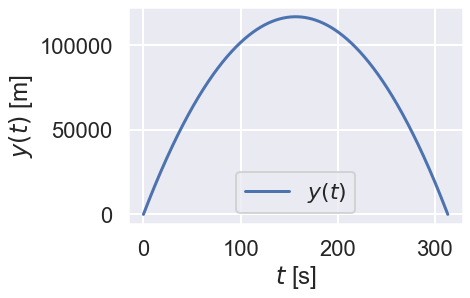

In [32]:
%matplotlib inline

# Let's get the total flight time by using an event: stop when y[0] < 0

T = np.arange(0, 400, DT)
Y0 = np.array([0, 1500]) # initial position, initial velocity
#sol = solve_ivp(fderiv, t_span=[T.min(), T.max()], t_eval=T, y0=Y0) # No event
# With event
def hitground(t, y) : 
    return y[0]
hitground.terminal = True # stops if hitground == 0
hitground.direction = -1 # only when going down

sol = solve_ivp(fderiv, t_span=[T.min(), T.max()], t_eval=T, y0=Y0, events=hitground)# with event


fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label=r"$y(t)$")
ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$y(t)$ [m]")
ax.legend()

print(np.max(sol.y[0]))

# Phase plane
The phase plane allows to study the solution of a differential equation from a geometric point of view. It basically is the plot of the derivative of a function and the function itself, that is, plotting $\dot x $ versus $x$. You have two options: 
1. Solve the systems and plot the data.
2. Use a geometric point of view where you focus on the derivatives and no solution is computed.

## Solving the system

### Predator prey model
The Lokta-Volterra equation is a non-linear model for the interaction between a population of preys and predators. The simplest version is as follows:
$$
\frac{dx}{dt} = ax - bxy,
$$
$$
\frac{dy}{dt} = -cy + dxy,
$$
where $x$ and $y$ are the number of prey and predators, respectively, $a$ the prey growth rate, $c$ the predator death rate and $b$ and $d$ characterizes the effect of the interaction.

Solve the system for the following parameters and plot the solution and also plot $y$ as a function of $x$ (this is called the phase plane, more on this later): $a = 1.2, b  = 0.6, c = 0.8, d = 0.3$. Take the initial conditions as $x(0) = 2$ and $y(0) = 1$, integrate from $t= 0$ to $50$, with $\delta t = 0.0625$. 

Text(0, 0.5, '$y$')

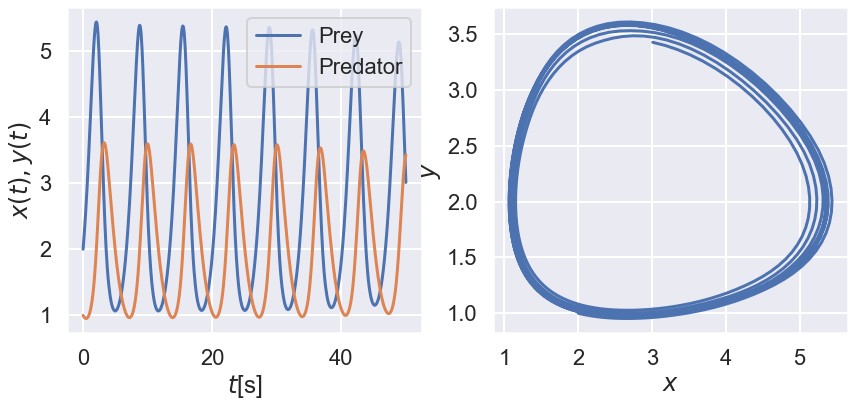

In [36]:
from scipy.integrate import solve_ivp
import numpy as np

A=1.2
B=0.6
C=0.8
D=0.3

X0=2
Y0=1
T0=0
TF=50
DT=0.0625

def fderiv(t, y): 
    return np.array([A*y[0] - B*y[0]*y[1], -C*y[1] + D*y[0]*y[1]])

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[X0, Y0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].plot(sol.t, sol.y[0], label=r"Prey")
ax[0].plot(sol.t, sol.y[1], label=r"Predator")
ax[0].set_xlabel(r"$t$[s]")
ax[0].set_ylabel(r"$x(t), y(t)$")
ax[0].legend()
ax[1].plot(sol.y[0], sol.y[1])
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")

# Can you compoute the critical points?

### Example : Lorenz model
A famous model showing chaotic behavior is the climate model proposed by Lorenz, 
$$
\frac{dx}{dt} = -a x + a y,
$$
$$
\frac{dy}{dt} = rx -y -xz,
$$
$$
\frac{dz}{dt} = -bz + xy.
$$
Solve the model for two very close initial conditions. And compare. Do you note something special? Also, for one of those initial conditions, plot the phase portrait in 2D and 3D. Use $a=10, b=8/3, r=28, x(0) = y(0) = z(0) = 5$, integrate from $t = 0$ to 20, and use $\delta t = 0.03125$. 

Text(0, 0.5, '$y$')

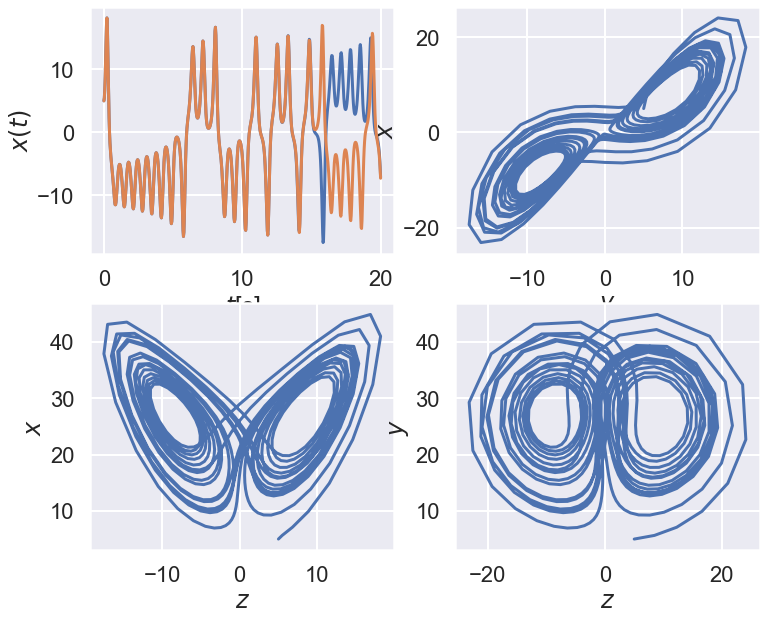

In [37]:
# Lorenz model
from scipy.integrate import solve_ivp
import numpy as np

A=10.0
B=8.0/3.0
R=28.0

X0=5
Y0=5
Z0=5
T0=0
TF=20
DT=0.03125

def fderiv(t, y): 
    return np.array([-A*y[0] + A*y[1], 
                     R*y[0] -y[1] - y[0]*y[2], 
                     -B*y[2] + y[0]*y[1]])

sol1 = solve_ivp(fderiv, t_span=[T0, TF], 
                t_eval=np.arange(T0, TF+DT, DT), 
                y0=[X0, Y0, Z0])
sol2 = solve_ivp(fderiv, t_span=[T0, TF], 
                t_eval=np.arange(T0, TF+DT, DT), 
                y0=[X0+0.0001, Y0, Z0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(2,2, figsize=(12, 10))
ax[0, 0].plot(sol1.t, sol1.y[0])
ax[0, 0].plot(sol2.t, sol2.y[0])
ax[0, 0].set_xlabel(r"$t$[s]")
ax[0, 0].set_ylabel(r"$x(t)$")
ax[0, 1].plot(sol1.y[0], sol1.y[1])
ax[0, 1].set_xlabel(r"$y$")
ax[0, 1].set_ylabel(r"$x$")
ax[1, 0].plot(sol1.y[0], sol1.y[2])
ax[1, 0].set_xlabel(r"$z$")
ax[1, 0].set_ylabel(r"$x$")
ax[1, 1].plot(sol1.y[1], sol1.y[2])
ax[1, 1].set_xlabel(r"$z$")
ax[1, 1].set_ylabel(r"$y$")

# See : https://www.youtube.com/watch?v=aAJkLh76QnM&t=2s

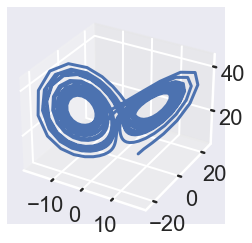

In [41]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol1.y[0], sol1.y[1], sol1.y[2])


In [43]:
!conda install -y -c conda-forge ipyvolume

Solving environment: done

# All requested packages already installed.



In [42]:
%matplotlib inline
import ipyvolume as ipv
import numpy as np
x, y, z = sol1.y[0], sol1.y[1], sol1.y[2]
#ipv.quickscatter(x, y, z, size=1, marker="sphere")
ipv.plot(x, y, z, size=0.05, marker="sphere")
ipv.show()

## Geometric view
In the geometric approach you are **actually NOT solving the system**. You are basically choosing many possible initial conditions and checking the slope (derivatives) at each point. This is very useful to understand the global dynamics of the system. Let's check the following example for the predator prey model.

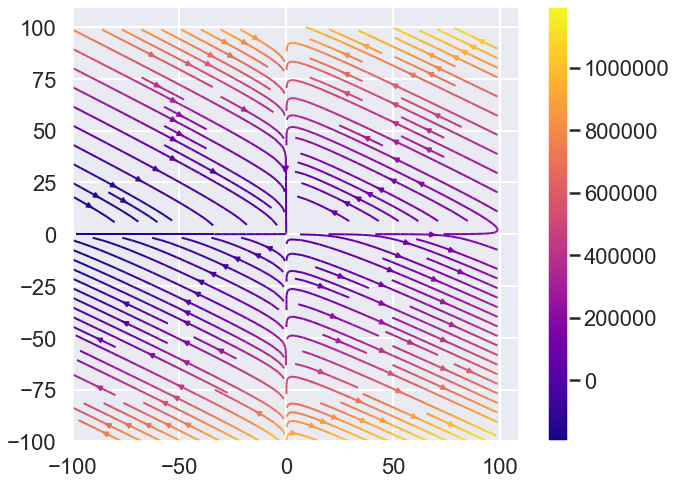

In [9]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')

A=1.2
B=0.6 # 0.6
C=0.8
D=0.3 # 0.3

# function to return the derivatives
def derivatives(y): 
    return np.array([A*y[0] - B*y[0]*y[1], -C*y[1] + D*y[0]*y[1]])

N = 60 # Number of initial conditions
XMIN = -100.0; XMAX = 100.0 # position
YMIN = -100.0; YMAX = 100.0 # velocity
X, Y = np.meshgrid(np.linspace(XMIN, XMAX, N), np.linspace(YMIN, YMAX, N))
DX, DY = derivatives([X, Y])

M = 200.0
E = M*9.81*X + 0.5*M*Y*Y

fig = plt.figure(figsize=(10,8))
plt.streamplot(X, Y, DX, DY, color=E, density=[1.5, 1.5], linewidth=2, cmap='plasma')
plt.colorbar()

(-3.1, 3.1)

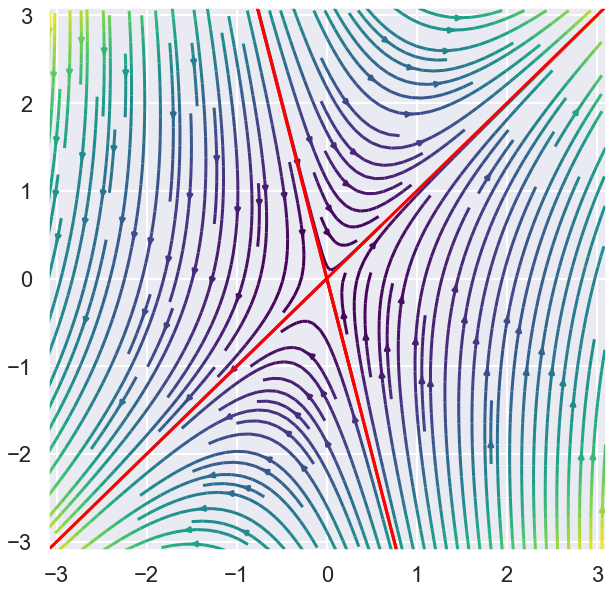

In [10]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,10))
# function to return the derivatives
def derivatives(state, A=np.eye(2), t=0): 
    xd = state[0] + state[1]
    yd = 4*state[0] - 2*state[1]
    return [xd, yd]

N = 20
MIN = -3.1
MAX = 3.1
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
E = X*X + Y*Y

A = np.array([[1., 1.], [4., -2.]])
DX, DY = derivatives([X, Y], A)
ax.streamplot(X, Y, DX, DY, color=E, cmap='viridis', density=1.8)
x = np.linspace(MIN, MAX, 50)
ax.plot(x, -0.9701425*x/0.24253563, lw=3, c='red')
ax.plot(x, x, lw=3, c='red')
ax.plot(x, -0.9701425*x/0.24253563, lw=3, c='red')
ax.set_xlim(MIN, MAX)
ax.set_ylim(MIN, MAX)

# Exercises

## Exercise
For the proyectile example, add damping of the form $-b\vec v$, where $b$ denotes the damping strength. Compute the maximum height as a function of $b$ for   $b = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]$, with fixed $v_0 = 1237$. Plot the results. What can you conclude?


## kiusalaas: Circuits
Solve this and also simulate the circuit at www.falstad.com to compare.
<img src="fig/kiusalaas-04.png">

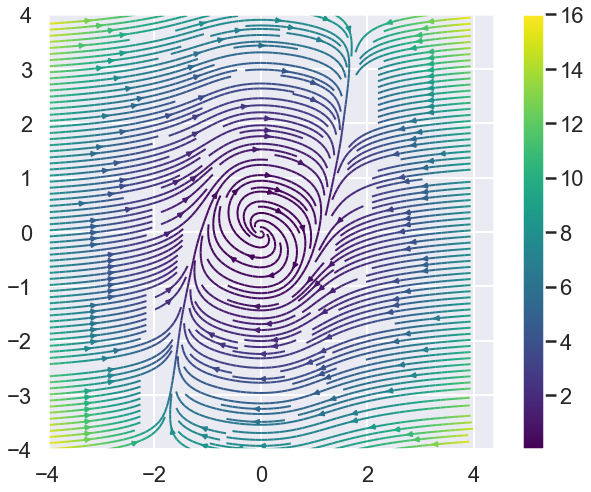

In [41]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')

# global parameters
MIU = 1.01 # angular frequency

# function to return the derivatives
def derivatives(state): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1] - MIU*(state[0]**3 - state[0])
    xdd = -state[0]
    return [xd, xdd]

N = 30
MIN = -4.0
MAX = 4.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
DX, DY = derivatives([X, Y])
E = 0.5*X*X + 0.5*Y*Y

fig = plt.figure(figsize=(10,8))
plt.streamplot(X, Y, DX, DY, color=E, density=[2.5, 2.5], linewidth=2, cmap='viridis')
xdata=np.linspace(-4, 4, 100)
plt.ylim([-4, 4])
plt.colorbar()

## Phase portrait
<img src="fig/phase-portrait-02.png">

CD = 0.03
range = 61.54638047834348
time of flight = 3.4339999999999997
max height = 14.886432121992529


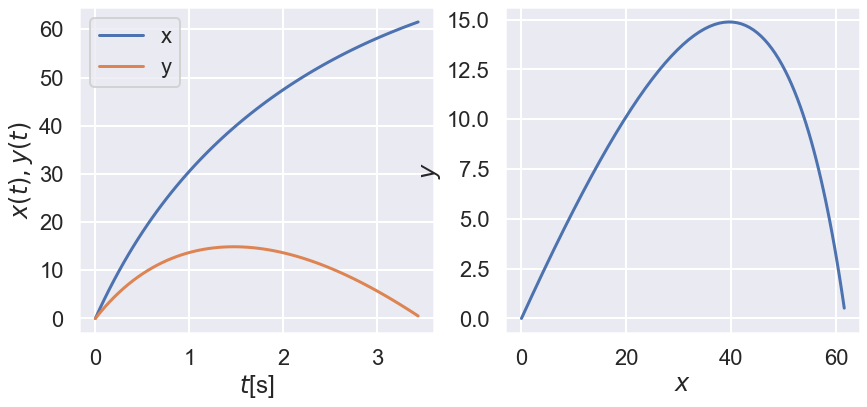

In [70]:
from scipy.integrate import solve_ivp
import numpy as np

# Parameters
CD = 0.03
M = 0.25
V0 = 50
THETA = 30*np.pi/180
G = 9.80665
# Time
T0 = 0
TF = 20.2
DT = TF/400
T  = np.arange(T0, TF+DT, DT)
# Initial conditions
X0=0.0; VX0 = V0*np.cos(THETA)
Y0=0.0; VY0 = V0*np.sin(THETA)

def hitground(t, y): return y[2]
hitground.terminal = True
hitground.direction = -1

# y has four components: x, vx, y, vy
def fderiv(t, y): 
    V = np.sqrt(y[1]**2 + y[3]**2)
    return np.array([y[1], -CD*y[1]*np.sqrt(V)/M, y[3], -CD*y[3]*np.sqrt(V)/M - G])

sol = solve_ivp(fderiv, t_span=[T.min(), T.max()], t_eval=T, y0=[X0, VX0, Y0, VY0],
               events=hitground)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].plot(sol.t, sol.y[0], label=r"x")
ax[0].plot(sol.t, sol.y[2], label=r"y")
ax[0].set_xlabel(r"$t$[s]")
ax[0].set_ylabel(r"$x(t), y(t)$")
ax[0].legend()
ax[1].plot(sol.y[0], sol.y[2])
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")

print(f"CD = {CD}")
print(f"range = {sol.y[0][-1]}")
print(f"time of flight = {sol.t[-1]}")
print(f"max height = {sol.y[2].max()}")

## kiusalaas: Real Projectiles
<img src="fig/kiusalaas-03.png">

## kiusalaas : Bouyancy
<img src="fig/kiusalaas-02-A.png">
<img src="fig/kiusalaas-02-B.png">


Text(0, 0.5, '$y$')

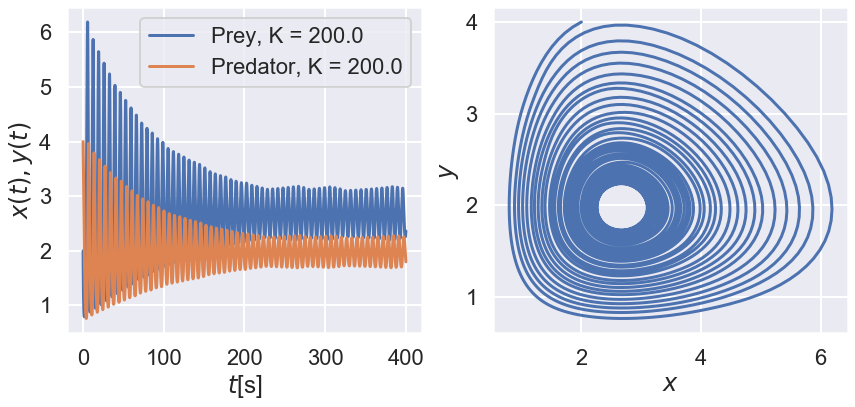

In [36]:
from scipy.integrate import solve_ivp
import numpy as np

A=1.2
B=0.6
C=0.8
D=0.3
K=2.0e2

X0=2
Y0=4
T0=0
TF=400
DT=0.0625

def fderiv(t, y): 
    return np.array([A*(1-y[0]/K)*y[0] - B*y[0]*y[1], -C*y[1] + D*y[0]*y[1]])

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[X0, Y0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].plot(sol.t, sol.y[0], label=r"Prey, K = {}".format(K))
ax[0].plot(sol.t, sol.y[1], label=r"Predator, K = {}".format(K))
ax[0].set_xlabel(r"$t$[s]")
ax[0].set_ylabel(r"$x(t), y(t)$")
ax[0].legend()
ax[1].plot(sol.y[0], sol.y[1])
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")


## Chapra: Modified Lokta-Volterra
<img src="fig/chapra-04-A.png">
<img src="fig/chapra-04-B.png">


## Chapra: Chemical reaction
<img src="fig/chapra-03.png">

In [44]:
!conda install -y fenics -c conda-forge

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/oquendo/miniconda3/envs/mdgp

  added / updated specs:
    - fenics


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.72.0           |       he5d75e3_3        15.4 MB  conda-forge
    cmake-3.18.2               |       h9f6fb0d_0        12.5 MB  conda-forge
    eigen-3.3.7                |    ha1b3eb9_1001         967 KB  conda-forge
    fenics-2019.1.0            |  py38h32f6830_10           9 KB  conda-forge
    fenics-dijitso-2019.1.0    |            py_10          42 KB  conda-forge
    fenics-dolfin-2019.1.0     |  py38h1933a79_10         1.2 MB  conda-forge
    fenics-ffc-2019.1.0        |            py_1

Text(0, 0.5, '$y$')

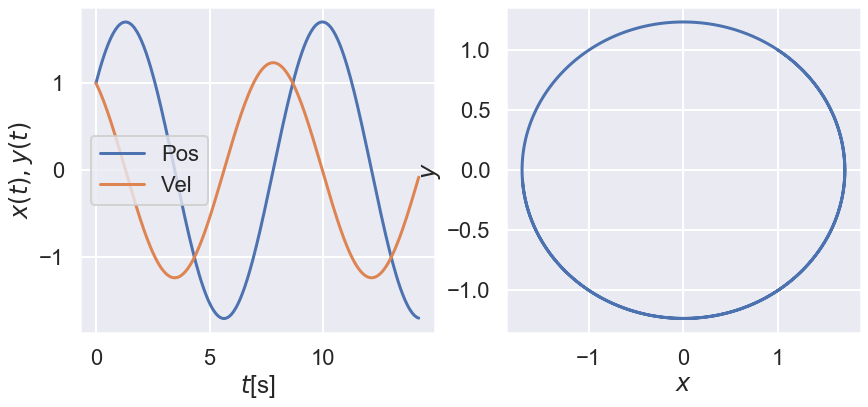

In [32]:
from scipy.integrate import solve_ivp
import numpy as np

# Parameters
A = 999
B = 1999
C = -1000
D = -2000
# Time
T0 = 0
TF = 14.2
DT = 0.05
T  = np.arange(T0, TF+DT, DT)
# Initial conditions
X0 = 1.0
Y0 = 1.0

def fderiv(t, y): 
    return np.array([y[1], -W*W*y[0]])

sol = solve_ivp(fderiv, t_span=[T.min(), T.max()], t_eval=T, y0=[X0, Y0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].plot(sol.t, sol.y[0], label=r"Pos")
ax[0].plot(sol.t, sol.y[1], label=r"Vel")
ax[0].set_xlabel(r"$t$[s]")
ax[0].set_ylabel(r"$x(t), y(t)$")
ax[0].legend()
ax[1].plot(sol.y[0], sol.y[1])
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")

## Chapra : Linear system
<img src="fig/chapra-01.png">

Text(0, 0.5, '$y$')

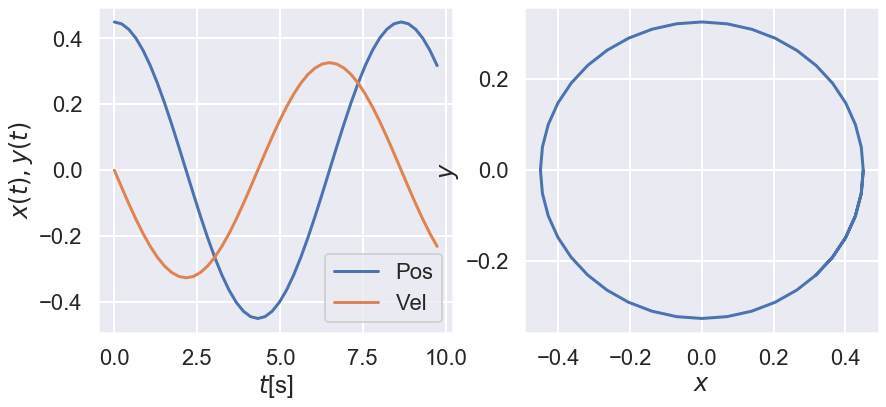

In [28]:
from scipy.integrate import solve_ivp
import numpy as np

# Parameters
K = 1.234
M = 2.345
W = np.sqrt(K/M)
# Time
T0 = 0
TF = 2.2*np.pi/W
DT = 0.05*np.pi/W
T  = np.arange(T0, TF+DT, DT)
# Initial conditions
X0=0.45
Y0=0.0

def fderiv(t, y): 
    return np.array([y[1], -W*W*y[0]])

sol = solve_ivp(fderiv, t_span=[T.min(), T.max()], t_eval=T, y0=[X0, Y0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].plot(sol.t, sol.y[0], label=r"Pos")
ax[0].plot(sol.t, sol.y[1], label=r"Vel")
ax[0].set_xlabel(r"$t$[s]")
ax[0].set_ylabel(r"$x(t), y(t)$")
ax[0].legend()
ax[1].plot(sol.y[0], sol.y[1])
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")

## The Harmonic oscillator

The harmonic oscillator is a paradigmatic example used in many applications, not only physics but also biology.
It is described by the following equation,
$$\frac{d^2x}{dt^2} = -\frac{k}{m} x,$$
where $x$ is the elongation, $k$ the elastic constant, and $m$ the mass attached the spring. The theoretical solution is 
$$x(t) = A\cos(\omega t + \phi),$$
where $A$ is the amplitude and $\phi$ the phase (both of which depend on the initial condition). And $\omega = \sqrt{k/m}$ is the frequency. 

In order to solve the previous differential equation, we need to transform it into a system of first order equations. We do this by introducing a new variable, the velocity, which is the derivative of the position, so now we have $\vec s = [x, v]$ and
$$
\frac{dx}{dt} = v,\\
\frac{dv}{dt} = -\frac{k}{m} x,
$$
so $\vec f = [v, -\frac{k}{m} x]$ . 

The exercise is to solve the previous equation for both the position and the velocity and to compare with the theoretical solution, using the Euler method. Choose the following : $k = 1.234$, $m=2.345$, $t \in [0, 2.2\pi/\omega]$, $x(0) = 0.45$, $v(0) = 0$, $\delta t = 0.2\pi/\omega$.

For $a<-1$, we have a **stable node**, and you can see that $x$ decays faster to zero than $y$. When $a = -1$, we have a very symmetrical case where both decaying rates are the same: the equilibrium point is called a **star**. When $-1 < a < 0$ we again have a stable node at the origin, but now the solutions decays faster along the $y$ direction. When $a=0$, $x$ does not change at all ,$x(t) = x_0$, and we have a family of stable nodes along the $x$-axis, or a **line of fixed points**. Finally, when $a > 0$, most trajectories are unstable and diverge to infinity, except for those where $x = 0$, the $y$ axis, they go to the origin. Here, the origin is called a **saddle-point**. 

# Linear stability analysis
A two dimensional linear system can be written as
\begin{align}
    \dot x &= ax + by,\\
    \dot y &= cx + dy,
\end{align}
or, equivalently,
\begin{equation}
    \dot{\vec{x}} = \mathbf{A} \vec x =     
    \left[ 
     \begin{array}{c}
            \dot x \\ \dot y
     \end{array} 
     \right] = 
    \begin{bmatrix}
        a & b \\
        c & d
    \end{bmatrix}
        \left[ 
     \begin{array}{c}
            x \\ y
     \end{array} 
     \right].
\end{equation}

As you could suspect, all the solutions properties are encoded inside the matrix $A$. Fixed points occur whenever $\dot{\vec x} = \vec 0$. From the definition, $(0, 0)$ is always a fixed point. In the case of the harmonic oscillator, the origin is called a focus (since all orbits are around it but never touch it). For the damped harmonic oscillator, the origin is called an stable equilibrium point, since it attracts all the trajectories in the phase plane. Soon we will learn more classifications.



In [11]:
from scipy import linalg
w, v = linalg.eig(A)
print(w)
print(v)

[ 2.+0.j -3.+0.j]
[[ 0.70710678 -0.24253563]
 [ 0.70710678  0.9701425 ]]


A two dimensional linear system can be written as
\begin{align}
    \dot x &= ax + by,\\
    \dot y &= cx + dy,
\end{align}
or, equivalently,
\begin{equation}
    \dot{\vec{x}} = \mathbf{A} \vec x =     
    \left[ 
     \begin{array}{c}
            \dot x \\ \dot y
     \end{array} 
     \right] = 
    \begin{bmatrix}
        a & b \\
        c & d
    \end{bmatrix}
        \left[ 
     \begin{array}{c}
            x \\ y
     \end{array} 
     \right].
\end{equation}

As you could suspect, all the solutions properties are encoded inside the matrix $A$. Fixed points occur wehenever $\dot{\vec x} = \vec 0$. From the definition, $(0, 0)$ is always a fixed point. In the case of the harmonic oscillator, the origin is called a focus (since all orbits are around it but never touch it). For the damped harmonic oscillator, the origin is called an stable equilibrium point, snce it attracts all the trajectories in the phase plane. Soon we will learn more classifications.

Let's take a system where $a$ is arbitrary, $b = c = 0$, and $d = -1$. The solution for this systems is, clearly,
\begin{align}
    x(t) &= x_0e^{at},\\ 
    y(t) &= y_0 e^{-t}.
\end{align}
Let's plot the phase portrait for several key values for $a$.

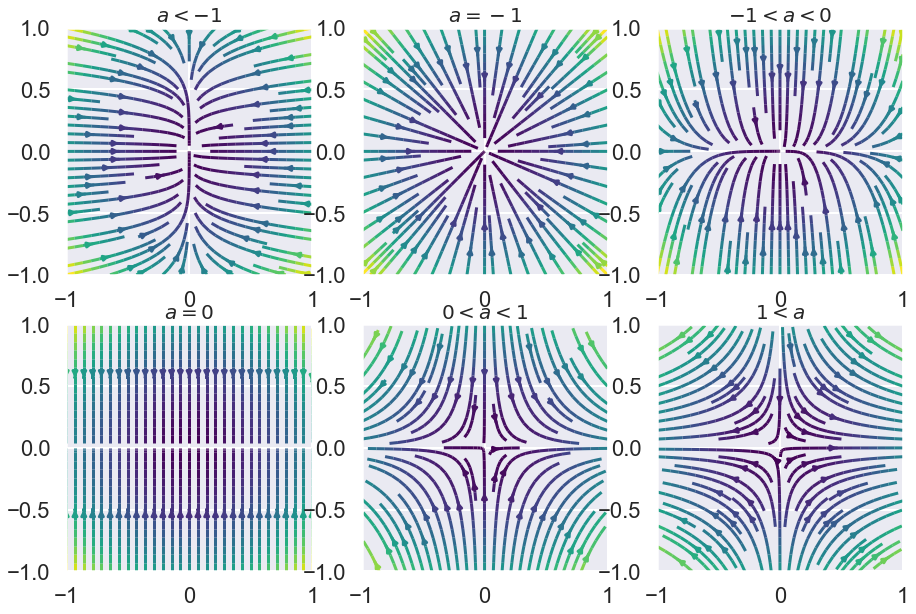

In [12]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')

fig, axes = plt.subplots(2, 3, figsize=(15,10))
# function to return the derivatives
def derivatives(state, A = 1.0, t=0): 
    xd  = A*state[0]
    yd = -state[1]
    return [xd, yd]

N = 30
MIN = -1.0
MAX = 1.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
E = X*X + Y*Y

A = [-5.0, -1.0, -0.2, 0, 0.5, 1.5] 
L = [r"$a < -1$", r"$a = -1$", r"$-1 < a < 0$", r"$a = 0$", r"$0 < a < 1$", r"$1 < a$"]
for iA in range(len(A)) :
    DX, DY = derivatives([X, Y], A[iA])
    axes[int(iA/3), iA%3].streamplot(X, Y, DX, DY, color=E, cmap='viridis')
    axes[int(iA/3), iA%3].set_xlim(MIN, MAX)
    axes[int(iA/3), iA%3].set_ylim(MIN, MAX)
    axes[int(iA/3), iA%3].set_title(L[iA], fontsize=20)